# Introdução:

A gestão eficaz de resíduos é um desafio crucial enfrentado por áreas urbanas em todo o mundo, com implicações significativas para o meio ambiente, a saúde pública e a economia. Em regiões urbanas densamente povoadas, como São Paulo, a geração e o gerenciamento de resíduos apresentam desafios únicos devido à grande população e à diversidade de atividades industriais e comerciais. Diante desse cenário, este estudo busca analisar a situação atual da geração, composição, reciclagem e gestão de resíduos na cidade de São Paulo, com o objetivo de identificar oportunidades para promover práticas mais sustentáveis de reciclagem e reuso de materiais.

Utilizamos dados públicos extraidos de sites oficiais:

Para a primeira parte do estudo utilizamos dados fornecidos pelo Sistema Nacional de Informações sobre Saneamento
http://app4.mdr.gov.br/serieHistorica/

Para a segunda parte do estudo utilizamos dados fornecidos pelo Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis - Ibama
https://dados.gov.br/dados/conjuntos-dados/residuos-solidos-armazenador1

# Objetivo:

Realizar uma análise abrangente dos resíduos em São Paulo para entender a quantidade, composição e eficácia dos programas de reciclagem. Com base nessa análise, fornecer insights e recomendações para promover práticas mais sustentáveis de reciclagem e reuso de materiais, visando reduzir o impacto ambiental e promover o desenvolvimento de uma economia circular na região.

# Resíduo Domiciliar e Urbano Para os anos de 2020, 2021 e 2022

## Importando bibliotecas e dados

In [29]:
import warnings

# Suprimir os avisos de FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_20 = pd.read_csv('Agrupamentos2020.csv')
data_21 = pd.read_csv('Agrupamentos2021.csv')
data_22 = pd.read_csv('Agrupamentos2022.csv')

## Preparando os dados

- Para o ano de 2020

In [6]:
data_20.head()

,Município,Ano de Referência,Coletado,Recicláveis,Papel e Papelão,Plástico,Metais,Vidros,Outros
0,Americana,2020,70937.5,1501.1,432.1,126.9,619.1,130.7,192.3
1,Artur Nogueira,2020,11673.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Arujá,2020,26400.0,518.9,157.3,106.1,25.6,84.8,145.1
3,Barueri,2020,94560.0,3640.0,1280.0,1460.0,360.0,360.0,180.0
4,Bertioga,2020,40240.4,571.3,NaN,NaN,NaN,NaN,NaN


In [7]:
data_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Município          67 non-null     object 
 1   Ano de Referência  67 non-null     object 
 2   Coletado           67 non-null     float64
 3   Recicláveis        52 non-null     float64
 4   Papel e Papelão    41 non-null     float64
 5   Plástico           41 non-null     float64
 6   Metais             41 non-null     float64
 7   Vidros             41 non-null     float64
 8   Outros             41 non-null     float64
dtypes: float64(7), object(2)
memory usage: 4.8+ KB


In [8]:
# Substituir valores não numéricos e nulos por NaN
data_20['Ano de Referência'] = pd.to_numeric(data_20['Ano de Referência'], errors='coerce')

# Substituir NaN por um valor padrão, por exemplo, 0
data_20['Ano de Referência'] = data_20['Ano de Referência'].fillna(2020)

# Converter a coluna 'Ano de Referência' para int
data_20['Ano de Referência'] = data_20['Ano de Referência'].astype(int)

In [9]:
# Substituir NaN por 0 em todo o DataFrame
data_20 = data_20.fillna(0)

data_20.head()

,Município,Ano de Referência,Coletado,Recicláveis,Papel e Papelão,Plástico,Metais,Vidros,Outros
0,Americana,2020,70937.5,1501.1,432.1,126.9,619.1,130.7,192.3
1,Artur Nogueira,2020,11673.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arujá,2020,26400.0,518.9,157.3,106.1,25.6,84.8,145.1
3,Barueri,2020,94560.0,3640.0,1280.0,1460.0,360.0,360.0,180.0
4,Bertioga,2020,40240.4,571.3,0.0,0.0,0.0,0.0,0.0


- Para o ano de 2021

In [10]:
data_21.head()

,Município,Ano de Referência,Coletado,Recicláveis,Papel e Papelão,Plásticos,Metais,Vidros,Outros
0,Americana,2021,69144.5,876.1,227.6,492.0,107.0,37.0,12.5
1,Artur Nogueira,2021,18526.7,NaN,NaN,NaN,NaN,NaN,NaN
2,Arujá,2021,28220.0,5.0,1.0,1.0,1.0,1.0,1.0
3,Barueri,2021,94800.0,3360.0,1008.0,672.0,504.0,504.0,672.0
4,Bertioga,2021,37717.0,755.3,NaN,NaN,NaN,NaN,NaN


In [11]:
data_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Município          67 non-null     object 
 1   Ano de Referência  67 non-null     object 
 2   Coletado           67 non-null     float64
 3   Recicláveis        50 non-null     float64
 4   Papel e Papelão    43 non-null     float64
 5   Plásticos          43 non-null     float64
 6   Metais             43 non-null     float64
 7   Vidros             43 non-null     float64
 8   Outros             43 non-null     float64
dtypes: float64(7), object(2)
memory usage: 4.8+ KB


In [12]:
# Substituir valores não numéricos e nulos por NaN
data_21['Ano de Referência'] = pd.to_numeric(data_21['Ano de Referência'], errors='coerce')

# Substituir NaN por um valor padrão, por exemplo, 0
data_21['Ano de Referência'] = data_21['Ano de Referência'].fillna(2021)

# Converter a coluna 'Ano de Referência' para int
data_21['Ano de Referência'] = data_21['Ano de Referência'].astype(int)

In [13]:
# prompt: Renomear a coluna Plásticos para Plástico

data_21.rename(columns={'Plásticos':'Plástico'}, inplace=True)


In [14]:
# Substituir NaN por 0 em todo o DataFrame
data_21 = data_21.fillna(0)

data_21.head()

,Município,Ano de Referência,Coletado,Recicláveis,Papel e Papelão,Plástico,Metais,Vidros,Outros
0,Americana,2021,69144.5,876.1,227.6,492.0,107.0,37.0,12.5
1,Artur Nogueira,2021,18526.7,0.0,0.0,0.0,0.0,0.0,0.0
2,Arujá,2021,28220.0,5.0,1.0,1.0,1.0,1.0,1.0
3,Barueri,2021,94800.0,3360.0,1008.0,672.0,504.0,504.0,672.0
4,Bertioga,2021,37717.0,755.3,0.0,0.0,0.0,0.0,0.0


- Para o ano de 2022

In [15]:
data_22.head()

,Município,Ano de Referência,Coletado,Recicláveis,Papel e Papelão,Plástico,Metais,Vidros,Outros
0,Adamantina,2022,10723.0,269.0,89.0,73.5,0.0,106.5,0.0
1,Adolfo,2022,1170.0,9.0,3.0,4.0,1.0,1.0,0.0
2,Aguaí,2022,7159.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Águas da Prata,2022,1182.0,113.0,34.0,21.0,3.0,55.0,0.0
4,Águas de Lindóia,2022,5797.1,5.0,1.0,1.0,1.0,1.0,1.0


In [16]:
data_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Município          629 non-null    object 
 1   Ano de Referência  629 non-null    int64  
 2   Coletado           629 non-null    float64
 3   Recicláveis        394 non-null    float64
 4   Papel e Papelão    301 non-null    float64
 5   Plástico           301 non-null    float64
 6   Metais             301 non-null    float64
 7   Vidros             301 non-null    float64
 8   Outros             301 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 44.4+ KB


In [17]:
# Substituir NaN por 0 em todo o DataFrame
data_22 = data_22.fillna(0)

data_22.head()

,Município,Ano de Referência,Coletado,Recicláveis,Papel e Papelão,Plástico,Metais,Vidros,Outros
0,Adamantina,2022,10723.0,269.0,89.0,73.5,0.0,106.5,0.0
1,Adolfo,2022,1170.0,9.0,3.0,4.0,1.0,1.0,0.0
2,Aguaí,2022,7159.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Águas da Prata,2022,1182.0,113.0,34.0,21.0,3.0,55.0,0.0
4,Águas de Lindóia,2022,5797.1,5.0,1.0,1.0,1.0,1.0,1.0


Agora vamos unir as tabelas

In [18]:
data = pd.concat([data_20, data_21, data_22], ignore_index=True)

In [19]:
data.head()

,Município,Ano de Referência,Coletado,Recicláveis,Papel e Papelão,Plástico,Metais,Vidros,Outros
0,Americana,2020,70937.5,1501.1,432.1,126.9,619.1,130.7,192.3
1,Artur Nogueira,2020,11673.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arujá,2020,26400.0,518.9,157.3,106.1,25.6,84.8,145.1
3,Barueri,2020,94560.0,3640.0,1280.0,1460.0,360.0,360.0,180.0
4,Bertioga,2020,40240.4,571.3,0.0,0.0,0.0,0.0,0.0


In [20]:
data["Ano de Referência"].unique()

array([2020, 2021, 2022], dtype=int64)

Parece que existe um dado inadequado, vamos corrigir excluindo a linha extra:

In [21]:
data = data[data['Ano de Referência'] != '---']

In [22]:
data["Ano de Referência"].unique()

array([2020, 2021, 2022], dtype=int64)

- Temos um DataFrame com os seguintes dados:

Município - Município do Estado de São Paulo

Ano de Referência - Ano que ocorreu a coleta

Coletado - Quantidade total de RDO e RPU coletada por agentes públicos e privados

Recicláveis - Quantidade total de materiais recicláveis recuperados

Papel e Papelão - Quantidade de Papel e papelão recicláveis recuperados

Plástico - Quantidade de Plásticos recicláveis recuperados

Metais - Quantidade de Metais recicláveis recuperados

Vidros - Quantidade de Vidros recicláveis recuperados

Outros - Quantidade de Outros materiais recicláveis recuperados (exceto pneus e eletrônicos)

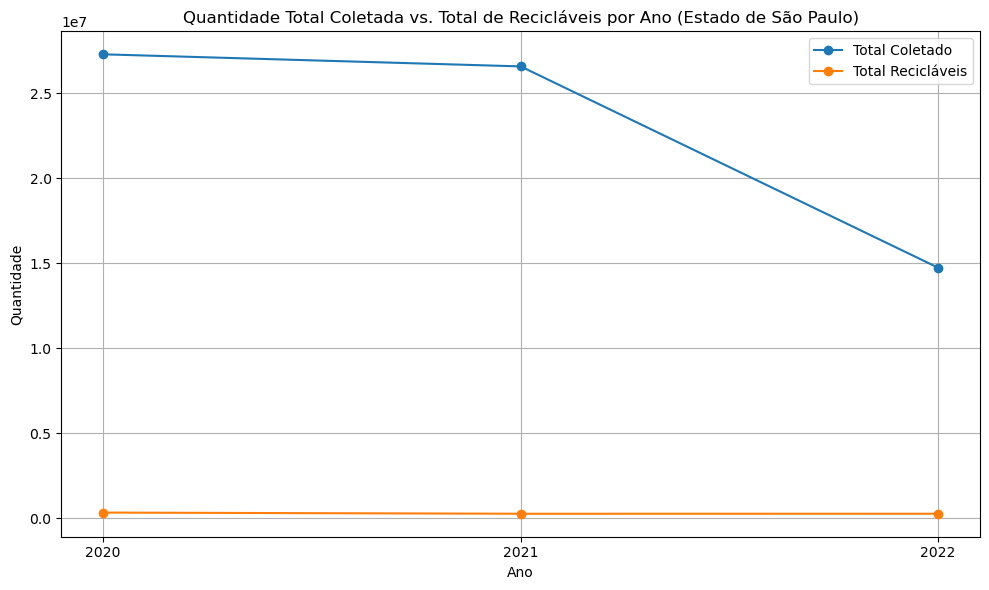

In [23]:
# Agrupar os dados por ano e calcular a quantidade total coletada e a quantidade total de recicláveis
total_coletado_por_ano = data.groupby('Ano de Referência')['Coletado'].sum()
total_reciclaveis_por_ano = data.groupby('Ano de Referência')['Recicláveis'].sum()

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(total_coletado_por_ano.index, total_coletado_por_ano.values, marker='o', label='Total Coletado')
plt.plot(total_reciclaveis_por_ano.index, total_reciclaveis_por_ano.values, marker='o', label='Total Recicláveis')

# Adicionar título e rótulos
plt.title('Quantidade Total Coletada vs. Total de Recicláveis por Ano (Estado de São Paulo)')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(total_coletado_por_ano.index)  # Garantir que os anos sejam exibidos corretamente no eixo x
plt.legend()

# Mostrar o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

## Quantidade Total de Resíduos Sólidos Gerados Anualmente

Para calcular a quantidade total de resíduos sólidos gerados anualmente na cidade de São Paulo, vamos agrupar os dados pelo ano e somar a quantidade coletada.

In [24]:
# Calcular a quantidade total de resíduos coletados por ano em todo o estado de São Paulo
total_residuos_anuais = data.groupby('Ano de Referência')['Coletado'].sum().reset_index()

total_residuos_anuais

,Ano de Referência,Coletado
0,2020,27276928.2
1,2021,26565710.4
2,2022,14724536.1


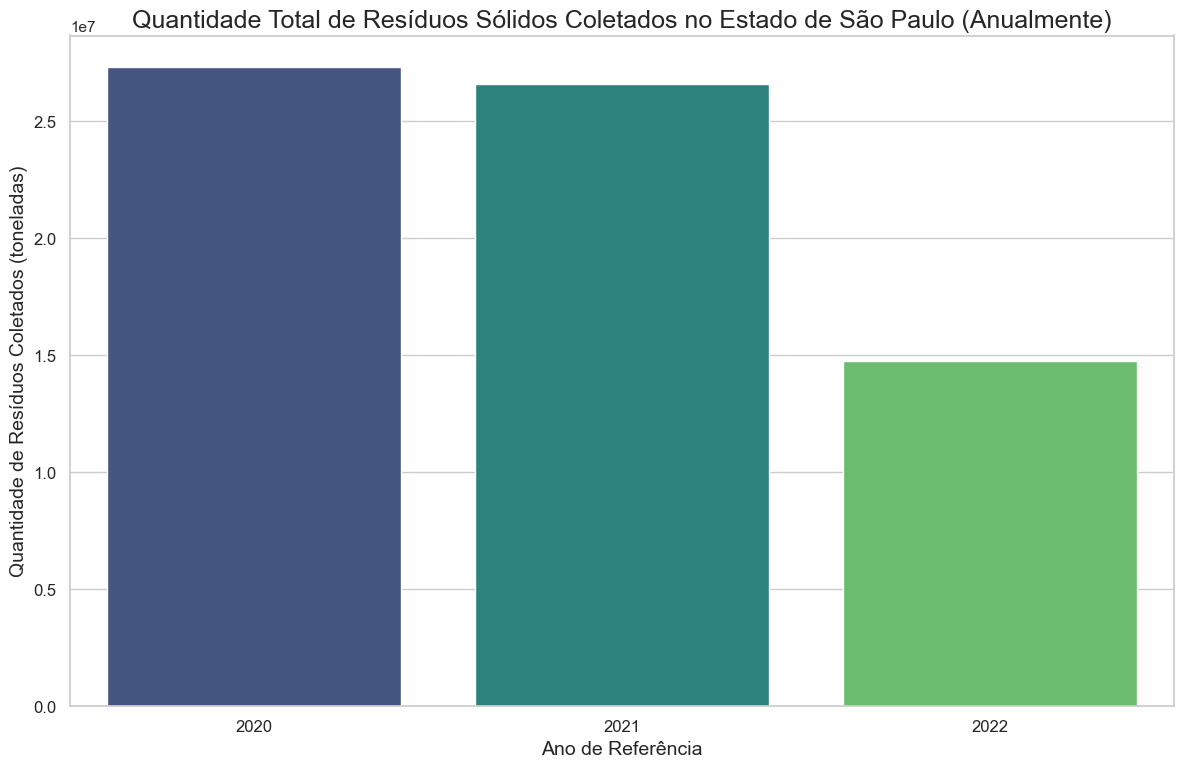

In [30]:
# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x='Ano de Referência', y='Coletado', data=total_residuos_anuais, hue='Ano de Referência', palette="viridis", dodge=False)

# Adicionar título e rótulos
plt.title('Quantidade Total de Resíduos Sólidos Coletados no Estado de São Paulo (Anualmente)', fontsize=18)
plt.xlabel('Ano de Referência', fontsize=14)
plt.ylabel('Quantidade de Resíduos Coletados (toneladas)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remover a legenda já que a variável x foi usada como hue
plt.legend([],[], frameon=False)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

Houve uma diminuição na quantidade total de resíduos sólidos coletados no estado de São Paulo ao longo dos anos, com uma queda significativa de 2021 para 2022.
Essa redução pode ser resultado de uma variedade de fatores, como mudanças nos padrões de consumo, políticas de gestão de resíduos ou eventos externos, como a pandemia de COVID-19.

## Composição dos Resíduos Sólidos no Estado de São Paulo

In [31]:
# Calcular a quantidade total de cada tipo de material reciclável por ano em todo o estado de São Paulo
composicao_residuos = data.groupby('Ano de Referência').sum().reset_index()
composicao_residuos = composicao_residuos[['Ano de Referência', 'Papel e Papelão', 'Plástico', 'Metais', 'Vidros', 'Outros']]

# Calcular o percentual de cada tipo de material
for col in ['Papel e Papelão', 'Plástico', 'Metais', 'Vidros', 'Outros']:
    composicao_residuos[col + ' (%)'] = composicao_residuos[col] / composicao_residuos[['Papel e Papelão', 'Plástico', 'Metais', 'Vidros', 'Outros']].sum(axis=1) * 100

composicao_residuos

,Ano de Referência,Papel e Papelão,Plástico,Metais,Vidros,Outros,Papel e Papelão (%),Plástico (%),Metais (%),Vidros (%),Outros (%)
0,2020,93020.7,81667.8,20772.0,22227.6,73066.5,31.992856,28.088223,7.144169,7.644797,25.129955
1,2021,121484.4,51043.5,21902.1,36253.5,8233.8,50.847888,21.364506,9.167231,15.174079,3.446297
2,2022,103387.7,40467.1,23562.7,31063.2,21148.3,47.073793,18.425208,10.728410,14.143487,9.629102


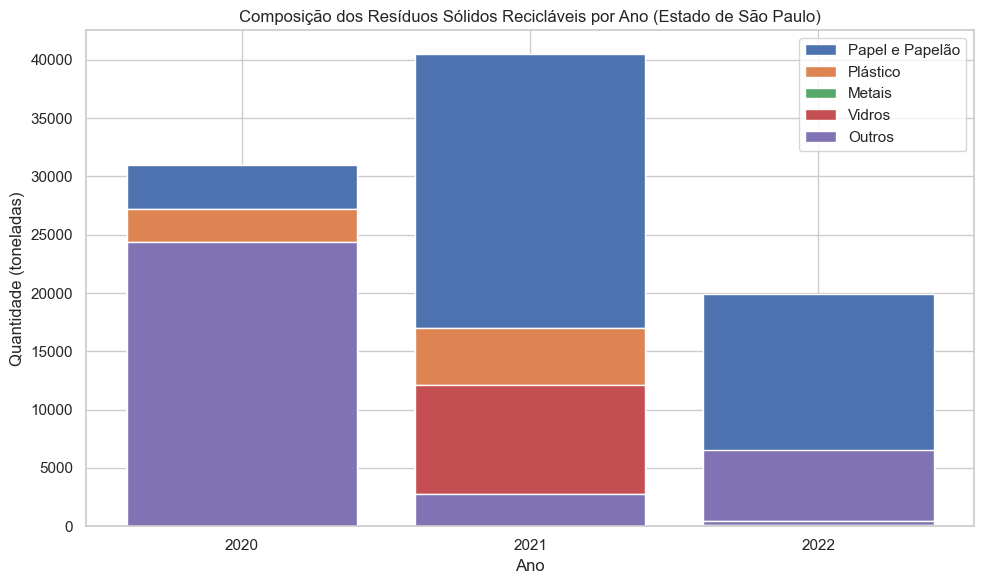

In [32]:
# Get the data
data_res = composicao_residuos

# Filter data for years 2020, 2021, and 2022
data = data[data["Ano de Referência"].isin([2020, 2021, 2022])]

# Criar o gráfico
plt.figure(figsize=(10, 6))

plt.bar(data["Ano de Referência"], data["Papel e Papelão"], label="Papel e Papelão")
plt.bar(data["Ano de Referência"], data["Plástico"], label="Plástico")
plt.bar(data["Ano de Referência"], data["Metais"], label="Metais")
plt.bar(data["Ano de Referência"], data["Vidros"], label="Vidros")
plt.bar(data["Ano de Referência"], data["Outros"], label="Outros")

# # Adicionar título e rótulos
plt.title("Composição dos Resíduos Sólidos Recicláveis por Ano (Estado de São Paulo)")
plt.xlabel("Ano")
plt.ylabel("Quantidade (toneladas)")

# anos 2020, 2021, and 2022
plt.xticks([2020, 2021, 2022])

# legenda
plt.legend()

plt.tight_layout()
plt.show()


Houve variações na composição dos resíduos sólidos ao longo dos anos de 2020 a 2022.
Por exemplo, a quantidade de papel e papelão diminuiu em 2022 em comparação com os anos anteriores, enquanto a quantidade de plástico e metais também diminuiu.

As variações percentuais na composição dos resíduos podem indicar mudanças nos padrões de consumo e nas práticas de reciclagem ao longo do tempo.
Por exemplo, houve uma queda significativa na proporção de papel e papelão em 2021, seguida por uma leve recuperação em 2022. Isso pode refletir mudanças nos hábitos de consumo ou na eficácia das práticas de reciclagem.

A presença de uma variedade de materiais recicláveis, como papel, plástico, metais e vidros, indica uma oportunidade para implementar estratégias abrangentes de reciclagem.
Diversificar os tipos de materiais reciclados pode ajudar a reduzir a dependência de uma única fonte de matéria-prima reciclada e promover uma economia circular mais robusta.

As informações sobre a composição dos resíduos podem orientar iniciativas de reciclagem, permitindo que os recursos sejam direcionados para os materiais com maior potencial de recuperação.
Identificar materiais com baixas taxas de reciclagem pode indicar áreas onde são necessárias melhorias nas práticas de coleta, triagem e processamento.

## Nível de Participação na Coleta Seletiva no Estado de São Paulo

Para analisar a participação dos domicílios e empresas na coleta seletiva, vamos calcular a quantidade de recicláveis em comparação ao total coletado.

In [34]:
# Calcular a quantidade total de recicláveis recuperados por ano em todo o estado de São Paulo
total_reciclaveis_anuais = data.groupby('Ano de Referência')['Recicláveis'].sum().reset_index()

# Calcular a taxa de participação na coleta seletiva
participacao_coleta_seletiva = pd.merge(total_residuos_anuais, total_reciclaveis_anuais, on='Ano de Referência')
participacao_coleta_seletiva['Taxa de Coleta Seletiva (%)'] = (participacao_coleta_seletiva['Recicláveis'] / participacao_coleta_seletiva['Coletado']) * 100

participacao_coleta_seletiva

,Ano de Referência,Coletado,Recicláveis,Taxa de Coleta Seletiva (%)
0,2020,27276928.2,330558.3,1.211860
1,2021,26565710.4,261807.9,0.985511
2,2022,14724536.1,262891.7,1.785399


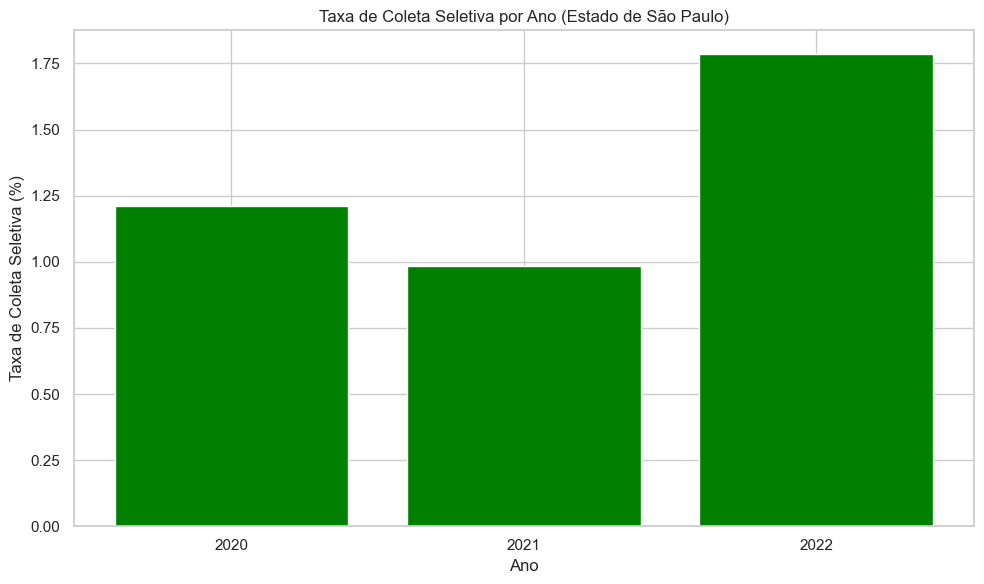

In [35]:
# Calcular a taxa de coleta seletiva por ano
taxa_coleta_seletiva = participacao_coleta_seletiva.groupby('Ano de Referência')['Taxa de Coleta Seletiva (%)'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(taxa_coleta_seletiva['Ano de Referência'], taxa_coleta_seletiva['Taxa de Coleta Seletiva (%)'], color='green')

# Adicionar título e rótulos
plt.title('Taxa de Coleta Seletiva por Ano (Estado de São Paulo)')
plt.xlabel('Ano')
plt.ylabel('Taxa de Coleta Seletiva (%)')

# anos 2020, 2021, and 2022
plt.xticks([2020, 2021, 2022])

# Mostrar o gráfico
plt.tight_layout()
plt.show()

Houve uma variação na taxa de coleta seletiva ao longo dos anos de 2020 a 2022.
A taxa de coleta seletiva é uma medida importante para avaliar o engajamento da comunidade na separação e reciclagem de resíduos sólidos.

A taxa de coleta seletiva em 2022 foi significativamente maior do que nos anos anteriores, indicando um aumento no engajamento da comunidade na separação e reciclagem de resíduos.
Essa tendência positiva pode ser resultado de várias iniciativas, como campanhas de conscientização pública, melhorias na infraestrutura de reciclagem e políticas governamentais favoráveis.

Apesar do aumento na taxa de coleta seletiva em 2022, ainda pode haver oportunidades de melhoria para aumentar ainda mais essa taxa. Uma maior taxa de coleta seletiva não apenas reduz a quantidade de resíduos enviados para aterros sanitários, mas também contribui para a conservação de recursos naturais e a redução da poluição ambiental.
Além disso, a coleta seletiva pode gerar empregos e promover o desenvolvimento econômico local, especialmente nas indústrias de reciclagem e reprocessamento de materiais.

## Taxa de Reciclagem no Estado de São Paulo

Para calcular a taxa de reciclagem, vamos usar os dados de resíduos reciclados versus resíduos gerados.

In [36]:
# Calcular a taxa de reciclagem
taxa_reciclagem = (total_reciclaveis_anuais['Recicláveis'].sum() / total_residuos_anuais['Coletado'].sum()) * 100
print(f"Taxa de Reciclagem: {taxa_reciclagem:.2f}%")

Taxa de Reciclagem: 1.25%


A taxa de reciclagem de 1.25% indica que apenas uma pequena proporção dos resíduos sólidos gerados no estado de São Paulo está sendo reciclada.
Isso sugere que existem desafios significativos a serem enfrentados no processo de reciclagem, incluindo problemas relacionados à coleta seletiva, triagem, processamento e mercado para materiais reciclados.

A baixa taxa de reciclagem sugere um grande potencial de melhoria na gestão de resíduos e na promoção da reciclagem em todo o estado de São Paulo.
A conscientização pública sobre a importância da reciclagem e o engajamento ativo da comunidade são fundamentais para aumentar a taxa de reciclagem.
Campanhas de educação ambiental, programas de incentivo à reciclagem e iniciativas de responsabilidade estendida do produtor podem ajudar a promover uma mudança de comportamento em relação à gestão de resíduos e à reciclagem.

# Resíduo Industrial para os anos de 2020, 2021 e 2022

Agora que já analisamos os resíduos urbanos, vamos analisar os resíduos industriais.

## Importando dados

In [37]:
df = pd.read_csv('df_armazenador.csv')

## Conhecendo os dados

In [38]:
df.head()

,nome_armazenador,estado,municipio,nome_geradora_residuo,residuo,ano,nome_distribuidor,quantidade,unidade
0,IDEAL COMERCIO DE TAMBORES LTDA,SAO PAULO,GUARULHOS,ACRILEX TINTAS ESPECIAIS S/A,Plasticos,2020,IDEAL COMERCIO DE TAMBORES LTDA,175.0,kilogramas (kg)
1,IDEAL COMERCIO DE TAMBORES LTDA,SAO PAULO,GUARULHOS,ACRILEX TINTAS ESPECIAIS S/A,Metais e derivados,2020,IDEAL COMERCIO DE TAMBORES LTDA,672.0,kilogramas (kg)
2,SUDESTE PAULISTA COM DE METAIS LTDA,SAO PAULO,SOROCABA,ZF DO BRASIL LTDA,Metais e derivados,2020,VALLOUREC SOLUÇÕES TUBULARES DO BRASIL S.A.,1388000.0,kilogramas (kg)
3,SUDESTE PAULISTA COM DE METAIS LTDA,SAO PAULO,SOROCABA,TT SERVIÇOS DE RECICLAGEM LTDA,Papel e Papelao,2020,GESCRAP - AUTOMETAL COMERCIO DE SUCATAS LTDA,832.2,kilogramas (kg)
4,SUDESTE PAULISTA COM DE METAIS LTDA,SAO PAULO,SOROCABA,GREENBRIER MAXION - EQUIPAMENTOS E SERVIÇOS FE...,Papel e Papelao,2020,GESCRAP - AUTOMETAL COMERCIO DE SUCATAS LTDA,87350.0,kilogramas (kg)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nome_armazenador       700 non-null    object 
 1   estado                 700 non-null    object 
 2   municipio              700 non-null    object 
 3   nome_geradora_residuo  700 non-null    object 
 4   residuo                700 non-null    object 
 5   ano                    700 non-null    int64  
 6   nome_distribuidor      700 non-null    object 
 7   quantidade             700 non-null    float64
 8   unidade                700 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 49.3+ KB


In [40]:
df['residuo'].unique()

array(['Plasticos', 'Metais e derivados', 'Papel e Papelao', 'Lodos',
       'Baterias e Pilhas', 'Borracha e derivados',
       'Madeiras e derivados', 'Acidos', 'Vidro', 'Oleos (L)',
       'Oleos (kg)', 'Outros (kg)', 'Outros (L)', 'Outros (UN)'],
      dtype=object)

In [41]:
df_outros = df[df['residuo'] == 'Outros (UN)']
df = df.drop(df_outros.index)

Esse DataFrame já foi tratado previamente, então não há necessidade de buscar por valores nulos ou ausentes, e todos as colunas estão com os tipos de dados adequados.

## Quantidade Total de Resíduos Sólidos Industriais Gerados Anualmente

Como já calculamos o total de resíduo urbano gerado anualmente, vamos fazer o mesmo para o resíduo industrial.

In [42]:
# Quantidade total de resíduos gerados anualmente
quantidade_anual = df.groupby('ano')['quantidade'].sum()
quantidade_anual.reset_index()

,ano,quantidade
0,2020,12256934.85
1,2021,7508919.85
2,2022,27371200.70


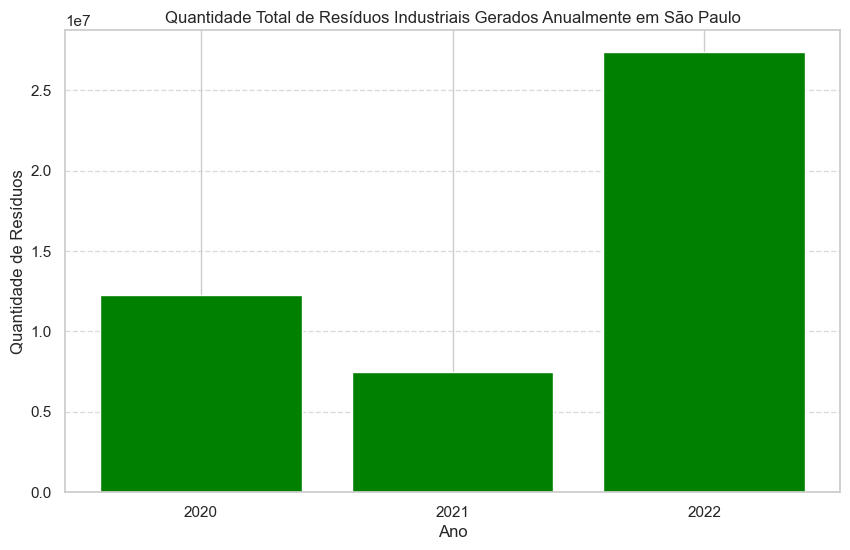

In [43]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(quantidade_anual.index, quantidade_anual.values, color='green')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Resíduos')
plt.title('Quantidade Total de Resíduos Industriais Gerados Anualmente em São Paulo')
plt.xticks(quantidade_anual.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()

Observamos uma redução significativa na quantidade total de resíduos gerados de 2020 para 2021, seguida por um aumento substancial em 2022. Essa tendência de redução seguida por um aumento sugere que podem ter ocorrido mudanças significativas nas políticas, práticas ou condições econômicas que influenciaram a geração de resíduos. A análise desses dados destaca a importância da sustentabilidade e da gestão adequada de resíduos. Variações significativas na quantidade total de resíduos gerados podem ter impactos ambientais, econômicos e sociais significativos, destacando a necessidade de estratégias eficazes de gestão de resíduos.

## Composição dos Resíduos Sólidos Industriais no Estado de São Paulo

In [44]:
# Composição dos resíduos sólidos
composicao_residuos = df.groupby('residuo')['quantidade'].sum()
composicao_percentual = (composicao_residuos / composicao_residuos.sum()) * 100
composicao_percentual.reset_index()


,residuo,quantidade
0,Acidos,8.830898
1,Baterias e Pilhas,0.058695
2,Borracha e derivados,0.645319
3,Lodos,1.060480
4,Madeiras e derivados,4.096807
5,Metais e derivados,36.304275
6,Oleos (L),1.093618
7,Oleos (kg),0.007875
8,Outros (L),0.517734
9,Outros (kg),40.599426


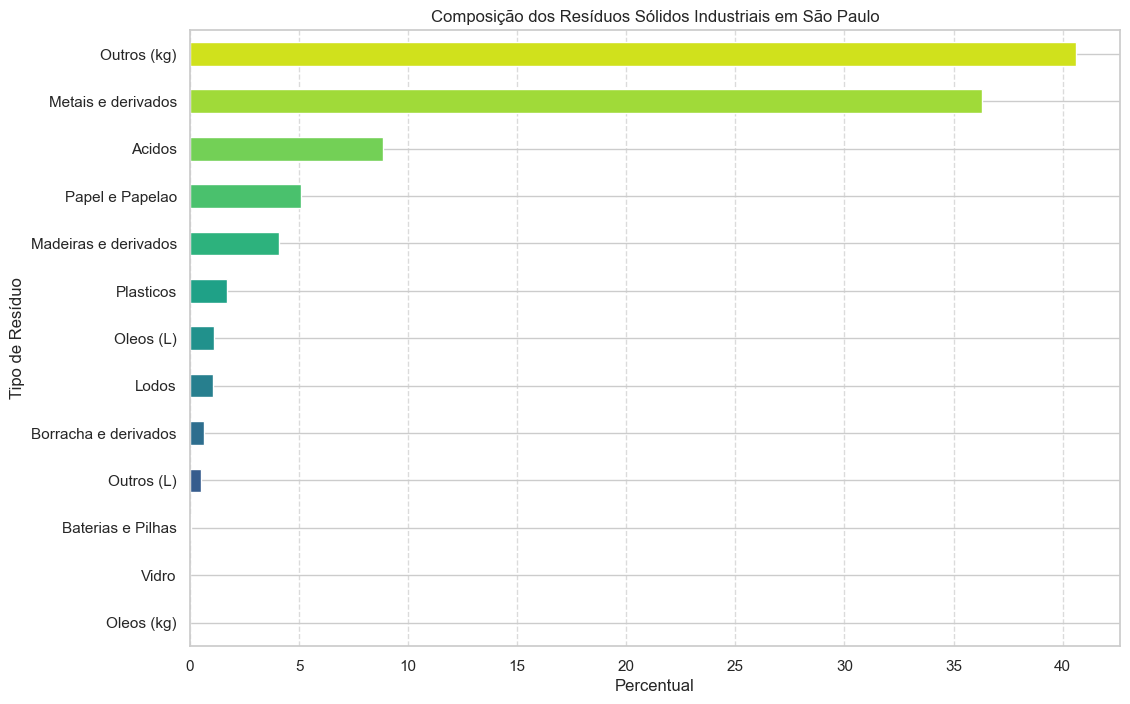

In [45]:
# Definir as cores
colors = sns.color_palette('viridis', len(composicao_percentual))

# Criar o gráfico de barras empilhadas com cores variadas
plt.figure(figsize=(12, 8))
composicao_percentual.sort_values().plot(kind='barh', color=colors)
plt.xlabel('Percentual')
plt.ylabel('Tipo de Resíduo')
plt.title('Composição dos Resíduos Sólidos Industriais em São Paulo')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()

A maior parte dos resíduos industriais é composta por "Metais e derivados" (36.304 kg) e "Outros (kg)" (40.599 kg). Isso indica que os resíduos metálicos e os resíduos classificados como "Outros" representam a maior parte dos resíduos gerados."Papel e Papelao" representam 5.095 kg dos resíduos, sendo uma fração significativa. Como papel e papelão são materiais amplamente recicláveis, há uma oportunidade clara para melhorar as taxas de reciclagem e reduzir a quantidade de resíduos que vão para os aterros. Lembrando que aqui estão apenas os dados de materiais que são coletados de Indústrias e não tudo que é gerado por essas Indústrias.

## Tendência Histórica da Geração de Resíduos Industriais

In [46]:
# Vamos assumir que temos dados de 3 anos específicos
anos = [2020, 2021, 2022]
tendencia_historica = df[df['ano'].isin(anos)].groupby('ano')['quantidade'].sum()
tendencia_historica

ano
2020    12256934.85
2021     7508919.85
2022    27371200.70
Name: quantidade, dtype: float64

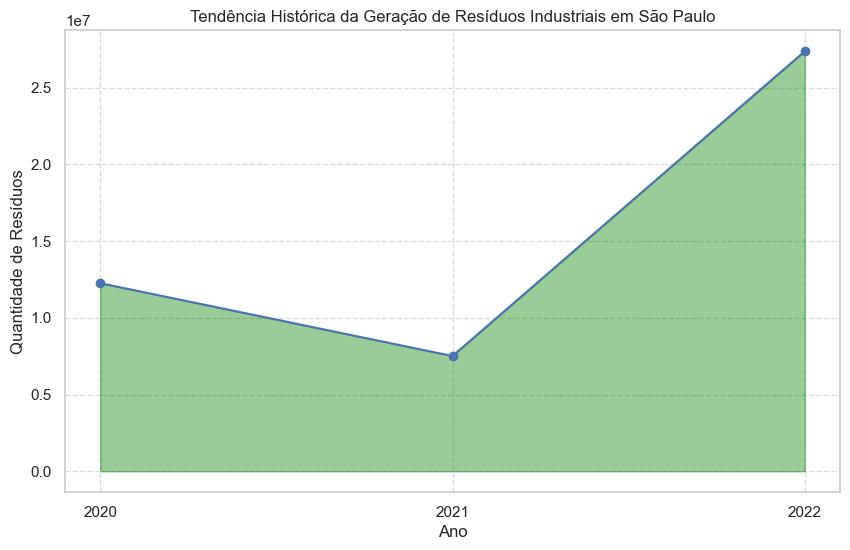

In [47]:
# Criar o gráfico de área com uma cor diferenciada
plt.figure(figsize=(10, 6))
plt.fill_between(tendencia_historica.index, tendencia_historica.values, color='green', alpha=0.4)
plt.plot(tendencia_historica.index, tendencia_historica.values, marker='o', linestyle='-', color='b')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Resíduos')
plt.title('Tendência Histórica da Geração de Resíduos Industriais em São Paulo')
plt.xticks(tendencia_historica.index)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()

Houve uma redução significativa na quantidade de resíduos gerados de 2020 para 2021, com uma queda de aproximadamente 38,7%.
Essa queda pode ser atribuída a vários fatores, como mudanças nas políticas de gestão de resíduos, aumento da reciclagem e reutilização, ou uma redução geral na produção industrial e no consumo devido à pandemia de COVID-19, que afetou muitas atividades econômicas.

Em 2022, observou-se um aumento drástico na geração de resíduos, com a quantidade mais que triplicando em relação a 2021 e mais que dobrando em relação a 2020.
Esse aumento pode ser resultado da recuperação econômica pós-pandemia, com retomada da produção industrial, aumento do consumo, e possíveis mudanças nas regulamentações que podem ter afetado a geração de resíduos.

## Perfil dos Geradores de Resíduos Industrial

In [48]:
# Agrupar por gerador e unidade, somando a quantidade
agrupado = df.groupby(['nome_geradora_residuo', 'unidade'])['quantidade'].sum().reset_index()

# Obter os 10 principais geradores
principais_geradores = agrupado.groupby('nome_geradora_residuo')['quantidade'].sum().sort_values(ascending=False).head(10).reset_index()

# Juntar com a unidade
principais_geradores = principais_geradores.merge(agrupado[['nome_geradora_residuo', 'unidade']], on='nome_geradora_residuo', how='left').drop_duplicates()

# Exibir o DataFrame resultante
principais_geradores

,nome_geradora_residuo,quantidade,unidade
0,BRASIL TERMINAL PORTUÁRIO S.A,9322471.0,kilogramas (kg)
1,TT SERVIÇOS DE RECICLAGEM LTDA,5407568.2,kilogramas (kg)
2,SUCALOG COMERCIO E RECICLAGEM DE METAIS EIRELI,5143570.0,kilogramas (kg)
3,GERDAU AÇOS LONGOS S.A.,4162430.0,kilogramas (kg)
4,ZF DO BRASIL LTDA,2860000.0,kilogramas (kg)
5,JF PASQUA CONDUTORES ELÉTRICOS LTDA,2539930.0,kilogramas (kg)
6,COMPANHIA SIDERÚRGICA NACIONAL,2228522.4,kilogramas (kg)
7,NESTLÉ BRASIL LTDA,1319490.0,kilogramas (kg)
8,CERVEJARIAS KAISER BRASIL S/A,1106070.0,kilogramas (kg)
9,TITAN PNEUS DO BRASIL LTDA,1052660.0,kilogramas (kg)


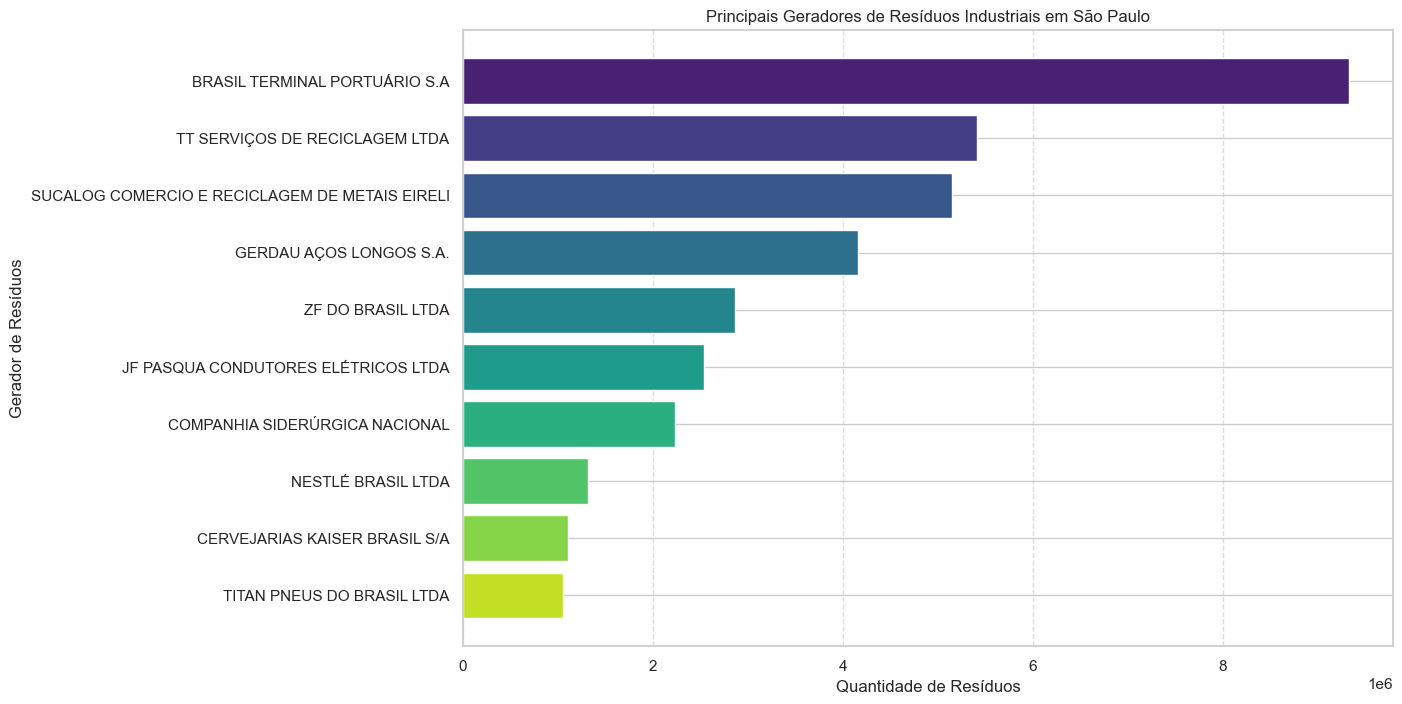

In [49]:
# Definir as cores
colors = sns.color_palette('viridis', len(principais_geradores))

# Criar o gráfico de barras horizontais com cores variadas
plt.figure(figsize=(12, 8))
plt.barh(principais_geradores['nome_geradora_residuo'], principais_geradores['quantidade'], color=colors)
plt.xlabel('Quantidade de Resíduos')
plt.ylabel('Gerador de Resíduos')
plt.title('Principais Geradores de Resíduos Industriais em São Paulo')
plt.gca().invert_yaxis()  # Inverter a ordem para mostrar o maior em cima
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()

As maiores quantidades de resíduos são geradas por empresas dos setores de logística portuária, reciclagem de metais, siderurgia e fabricação de componentes industriais. Essas indústrias são tradicionalmente conhecidas por seus altos volumes de resíduos devido à natureza de suas operações.

**BRASIL TERMINAL PORTUÁRIO S.A** é a maior geradora de resíduos, com uma quantidade significativamente maior (9.322.471 kg) em comparação com outras empresas. Este número pode refletir a grande escala de operações e movimentação de materiais no terminal portuário.

Empresas como **TT SERVIÇOS DE RECICLAGEM LTDA** e **SUCALOG COMERCIO** E **RECICLAGEM DE METAIS EIRELI** estão entre as maiores geradoras de resíduos, o que pode ser um reflexo da quantidade de materiais que passam por processos de reciclagem.

As empresas listadas devem continuar aprimorando suas práticas de gestão de resíduos, incluindo a implementação de tecnologias mais limpas, redução na fonte e aumento da eficiência dos processos de reciclagem.

# Comparando Industrial x Urbano

Para comparar os dados de Resíduo Industrial e Urbano precisamos unir os DataFrames 'data' e 'df', porém, os dois DataFrames são diferentes entre si em questão de organização, por isso precisaremos de alguns ajustes antes de iniciarmos as comparações.

In [50]:
# Selecionar apenas as colunas importantes
colunas_industriais = ['nome_armazenador', 'estado', 'municipio', 'nome_geradora_residuo', 'residuo', 'ano', 'quantidade', 'unidade']
colunas_urbano = ['Município', 'Ano de Referência', 'Coletado', 'Recicláveis', 'Papel e Papelão', 'Plástico', 'Metais', 'Vidros', 'Outros']

df = df[colunas_industriais]
data = data[colunas_urbano]

- Vamos converter todos os resíduos para a mesma unidade de medida, que no caso é a tonelada.

In [51]:
# Fatores de conversão baseados em suposições comuns
fatores_conversao = {
    'Oleos (L)': 0.9,        # 1 L = 0.9 kg
    'Oleos (kg)': 1,         # 1 kg = 1 kg
    'Outros (L)': 0.9,       # 1 L = 0.9 kg
    'Outros (kg)': 1,        # 1 kg = 1 kg
}

# Função para converter unidades para kg
def converter_para_kg(row):
    if row['residuo'] in fatores_conversao:
        fator = fatores_conversao[row['residuo']]
        return row['quantidade'] * fator
    return row['quantidade']

# Aplicar a conversão ao DataFrame
df['quantidade_kg'] = df.apply(converter_para_kg, axis=1)

# Converter de kg para toneladas (1 tonelada = 1000 kg)
df['quantidade'] = df['quantidade_kg'] / 1000


In [52]:
# Remover as colunas desnecessárias
df.drop(columns=['quantidade_kg', 'unidade'], inplace=True)

- Os tipos de resíduos foram nomeados de maneiras difertentes nos dois DataFrames, vamos corrigir isso também.

In [53]:
# Padronizar os nomes dos resíduos para corresponder aos nomes das colunas no DataFrame `data`
df['residuo'] = df['residuo'].replace({
    'Plasticos': 'Plástico',
    'Vidro': 'Vidros',
    'Metais e derivados': 'Metais',
    'Papel e Papelao': 'Papel e Papelão',
    'Oleos (L)': 'Oleos',
    'Oleos (kg)': 'Oleos',
    'Outros (kg)': 'Outros',
    'Outros (L)': 'Outros',
})

- Precisamos usar o **pd.melt** para transformar as colunas de tipos de resíduos (Papel e Papelão, Plástico, etc.) em uma estrutura longa que corresponde aos tipos de resíduos no DataFrame industrial.

In [54]:
# Transformar os dados urbanos para corresponder à estrutura dos dados industriais
data_melted = data.melt(id_vars=['Município', 'Ano de Referência'],
                        value_vars=['Papel e Papelão', 'Plástico', 'Metais', 'Vidros', 'Outros'],
                        var_name='residuo',
                        value_name='quantidade')

- E também renomear as colunas.

In [55]:
# Renomear colunas para coincidir com o DataFrame industrial
data_melted.rename(columns={'Município': 'municipio', 'Ano de Referência': 'ano'}, inplace=True)

- Por fim, vamos adicionar uma nova coluna para identificar os tipos de resíduo, e já podemos unir os DataFrames.

In [56]:
df['segmento'] = 'Indústrias'
data_melted['segmento'] = 'Urbano'

In [57]:
# Combinar os DataFrames
df_combinado = pd.concat([df, data_melted], ignore_index=True)

df_combinado.head()

,nome_armazenador,estado,municipio,nome_geradora_residuo,residuo,ano,quantidade,segmento
0,IDEAL COMERCIO DE TAMBORES LTDA,SAO PAULO,GUARULHOS,ACRILEX TINTAS ESPECIAIS S/A,Plástico,2020,0.1750,Indústrias
1,IDEAL COMERCIO DE TAMBORES LTDA,SAO PAULO,GUARULHOS,ACRILEX TINTAS ESPECIAIS S/A,Metais,2020,0.6720,Indústrias
2,SUDESTE PAULISTA COM DE METAIS LTDA,SAO PAULO,SOROCABA,ZF DO BRASIL LTDA,Metais,2020,1388.0000,Indústrias
3,SUDESTE PAULISTA COM DE METAIS LTDA,SAO PAULO,SOROCABA,TT SERVIÇOS DE RECICLAGEM LTDA,Papel e Papelão,2020,0.8322,Indústrias
4,SUDESTE PAULISTA COM DE METAIS LTDA,SAO PAULO,SOROCABA,GREENBRIER MAXION - EQUIPAMENTOS E SERVIÇOS FE...,Papel e Papelão,2020,87.3500,Indústrias


In [58]:
df_combinado.fillna(0, inplace=True)


## Resíduos Totais

In [59]:
# Comparação dos resíduos gerados por segmento
total_residuos_por_segmento = df_combinado.groupby('segmento')['quantidade'].sum()
total_residuos_por_segmento.reset_index()

,segmento,quantidade
0,Indústrias,47061.10101
1,Urbano,749300.90000


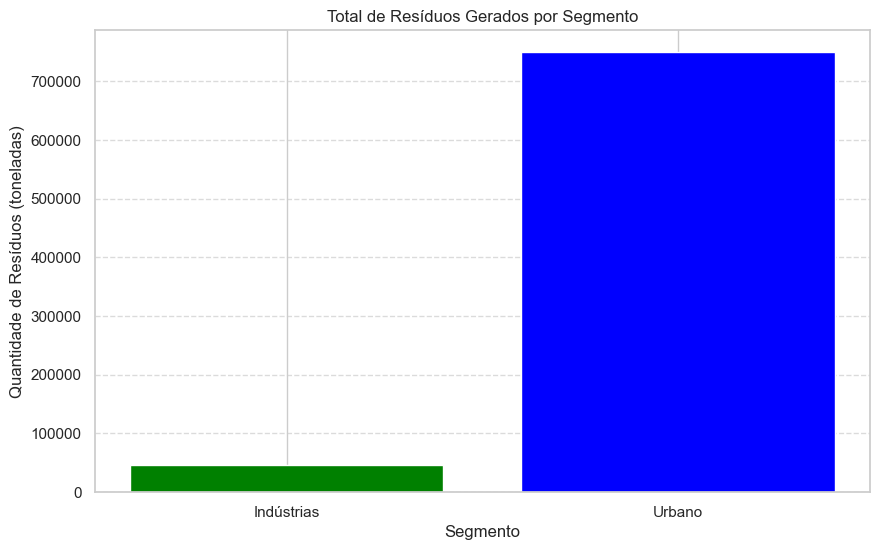

In [60]:
import matplotlib.pyplot as plt
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(total_residuos_por_segmento.index, total_residuos_por_segmento.values, color=['green', 'blue'])
plt.xlabel('Segmento')
plt.ylabel('Quantidade de Resíduos (toneladas)')
plt.title('Total de Resíduos Gerados por Segmento')
plt.xticks(total_residuos_por_segmento.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()


A quantidade de resíduos reciclados gerada pelo segmento urbano (749.300,90 toneladas) é significativamente maior do que a gerada pelo segmento industrial (47.061,10 toneladas). Isso indica que, em termos absolutos, a contribuição do setor urbano para a reciclagem é muito maior do que a do setor industrial.

A grande diferença entre os resíduos reciclados nos segmentos urbano e industrial pode ser atribuída ao fato de que os resíduos urbanos incluem uma ampla variedade de materiais recicláveis, como papel, plástico, vidro e metais, provenientes de atividades domésticas e comerciais. Em contraste, os resíduos industriais podem incluir uma maior proporção de materiais não recicláveis ou que requerem processos de reciclagem mais complexos.

A menor quantidade de resíduos reciclados no setor industrial sugere que há um grande potencial para aumentar a taxa de reciclagem neste segmento. As indústrias podem investir em tecnologias de reciclagem mais eficientes e em práticas de gestão de resíduos que promovam a reutilização e reciclagem de materiais.

Aumentar a quantidade de resíduos reciclados tanto no segmento urbano quanto no industrial tem benefícios ambientais significativos, como a redução do uso de recursos naturais e a diminuição da quantidade de resíduos enviados para aterros sanitários. Além disso, a reciclagem pode gerar oportunidades econômicas, criando empregos e estimulando o desenvolvimento de novos mercados para materiais reciclados.


## Composição

In [61]:
# Composição dos resíduos sólidos por segmento
composicao_residuos = df_combinado.groupby(['segmento', 'residuo'])['quantidade'].sum().unstack().fillna(0)

In [62]:
composicao_residuos

residuo,Acidos,Baterias e Pilhas,Borracha e derivados,Lodos,Madeiras e derivados,Metais,Oleos,Outros,Papel e Papelão,Plástico,Vidros
segmento,,,,,,,,,,,
Indústrias,4162.6255,27.66688,304.18429,499.879,1931.114,17112.76603,467.66155,19357.01387,2401.90169,792.5204,3.7678
Urbano,0.0000,0.00000,0.00000,0.000,0.000,66236.80000,0.00000,102448.60000,317892.80000,173178.4000,89544.3000


* O motivo para alguns tipos de resíduos estarem zerados no segmento urbano é porque não encontramos dados das coletas dos mesmos.

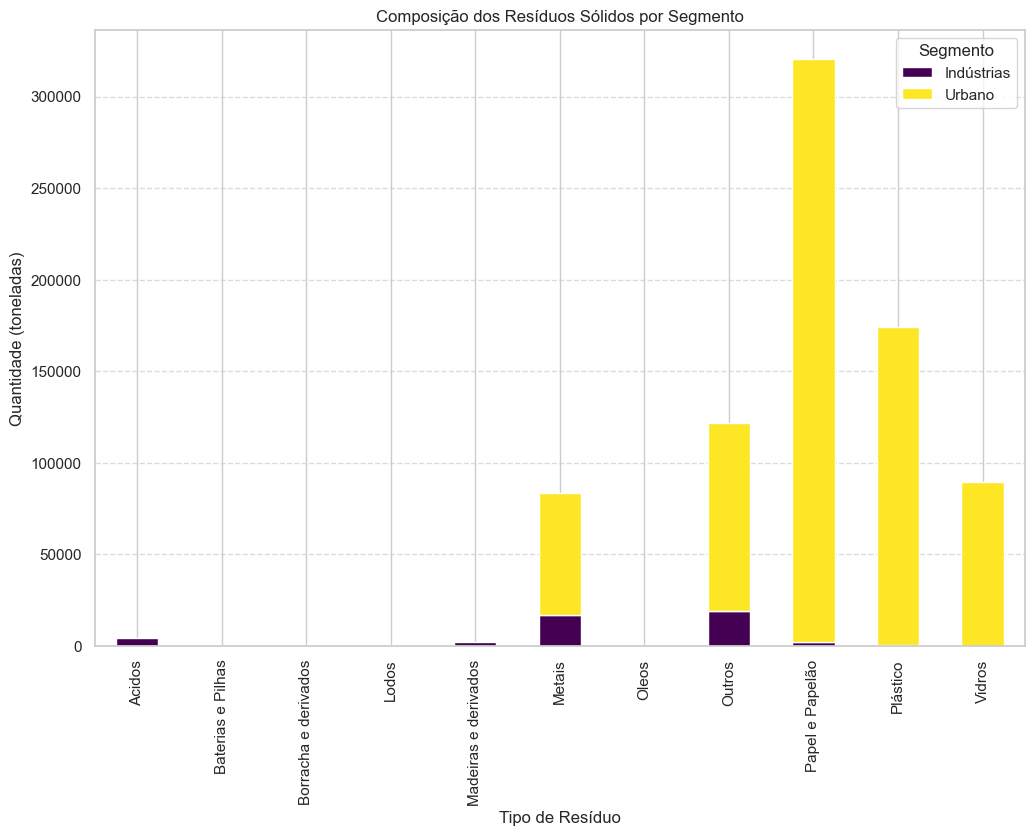

In [63]:
# Criar o gráfico de barras empilhadas
composicao_residuos.T.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.xlabel('Tipo de Resíduo')
plt.ylabel('Quantidade (toneladas)')
plt.title('Composição dos Resíduos Sólidos por Segmento')
plt.legend(title='Segmento')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Há uma clara diferença na composição dos resíduos recicláveis entre os segmentos industrial e urbano. Os resíduos urbanos possuem grandes quantidades de Papel e Papelão, Plástico e Vidros, enquanto os resíduos industriais são mais diversificados. Papel e Papelão é o maior componente dos resíduos urbanos, totalizando 317.892,80 toneladas. Isso reflete a grande quantidade de embalagens e produtos de papel descartados por residências e estabelecimentos comerciais.

O segmento industrial apresenta uma maior diversidade de resíduos recicláveis. Metais (17.112,77 toneladas) e Outros resíduos (19.357,01 toneladas) são as maiores categorias, seguidas por Ácidos (4.162,63 toneladas) e Papel e Papelão (2.401,90 toneladas).


##Tendência Histórica da Geração de Resíduos

In [64]:
# Tendência histórica nos últimos anos por segmento
tendencia_hist = df_combinado.groupby(['ano', 'segmento'])['quantidade'].sum().unstack().fillna(0)
tendencia_hist

segmento,Indústrias,Urbano
ano,,
2020,12247.32571,290754.6
2021,7502.77310,238917.3
2022,27311.00220,219629.0


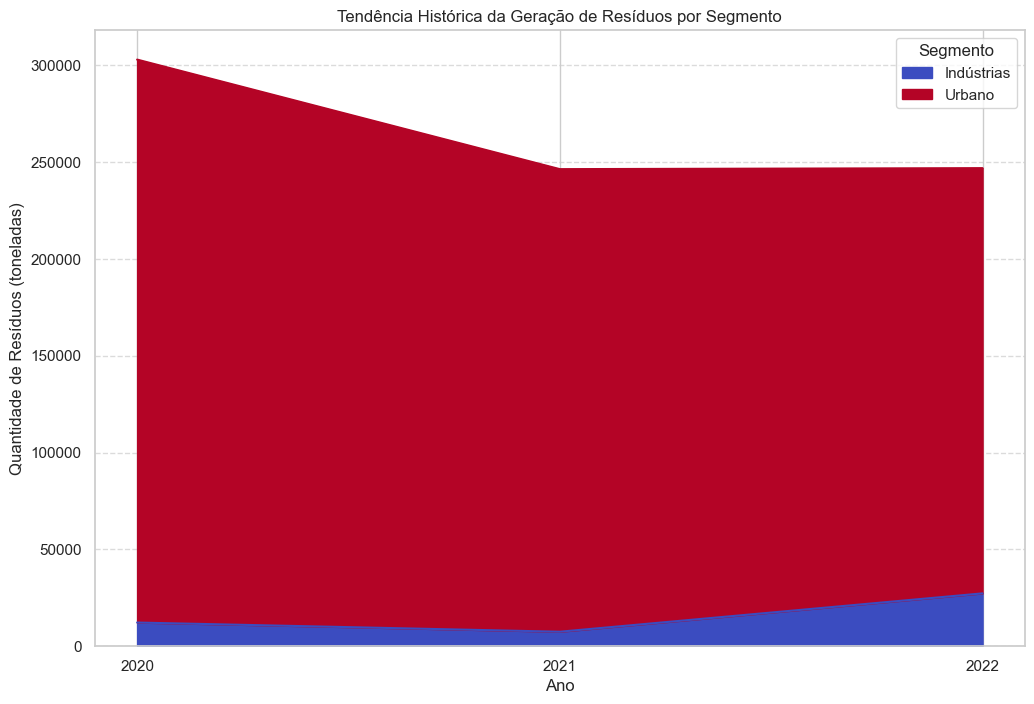

In [65]:
# Criar o gráfico de área
tendencia_hist.plot(kind='area', figsize=(12, 8), colormap='coolwarm')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Resíduos (toneladas)')
plt.title('Tendência Histórica da Geração de Resíduos por Segmento')
plt.legend(title='Segmento')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# anos 2020, 2021, and 2022
plt.xticks([2020, 2021, 2022])
plt.show()

Há uma clara diferença na quantidade de resíduos reciclados entre os segmentos industrial e urbano ao longo dos três anos. O segmento urbano gera consistentemente mais resíduos recicláveis do que o segmento industrial.

# Conclusão

**Principais Observações:**
1. **Alta Geração de Resíduos:**

A quantidade total de resíduos sólidos gerados anualmente é significativa e crescente. Em 2022, foram gerados 27,371,200.70 toneladas, um aumento substancial comparado aos anos anteriores.
2. **Diversidade na Composição de Resíduos:**

Resíduos como metais, papel e papelão, e plásticos constituem grandes volumes tanto nos setores industriais quanto urbanos. A presença de resíduos que podem ser reciclados indica um grande potencial de reaproveitamento de materiais.
3. **Principais Geradores:**

Grandes empresas industriais são responsáveis por volumes significativos de resíduos recicláveis. Conectar essas empresas diretamente com compradores e catadores pode facilitar a gestão e o reaproveitamento desses materiais.
4. **Participação no Reciclagem:**

Embora o segmento urbano recicle uma quantidade consideravelmente maior de resíduos em comparação com o segmento industrial, a taxa de participação na coleta seletiva em São Paulo é de apenas 1,25%. Em 2022, o segmento urbano reciclou 219,629.00 toneladas de resíduos, enquanto o segmento industrial reciclou 27,311.00 toneladas. Isso indica que, apesar do volume significativo de resíduos reciclados, há um vasto potencial não explorado devido à baixa adesão à coleta seletiva. Portanto, aumentar a participação na coleta seletiva é crucial para otimizar a reciclagem e maximizar o reaproveitamento de materiais.
5. **Oportunidades para Reuso e Reciclagem:**

A análise detalhada da composição dos resíduos indica que há uma ampla variedade de materiais que podem ser reciclados ou reutilizados. O óleo, por exemplo, aparece em ambas as categorias de resíduos e pode ser um foco para iniciativas de reciclagem.

**Conclusão**

Os dados e análises deste estudo destacam a necessidade de conectar diferentes atores do ciclo de resíduos para promover a reciclagem e o reuso de materiais. Isso proporcionaria benefícios econômicos, ambientais e sociais significativos, incentivando uma gestão mais eficiente dos resíduos. A criação de um sistema que facilite essa conexão pode otimizar a logística, aumentar a participação na reciclagem e reduzir a quantidade de resíduos enviados para aterros, contribuindo para a sustentabilidade ambiental e promovendo práticas mais conscientes na comunidade.